# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Plabon\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


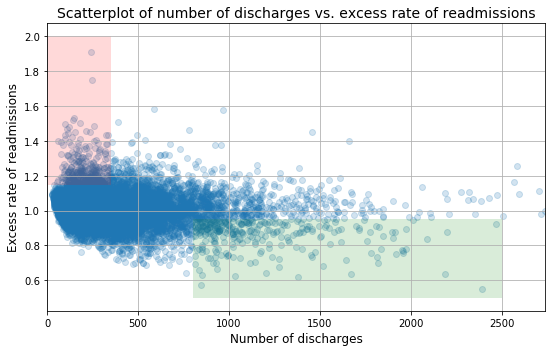

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

**I do not agree with the above analysis.**

- The missing data was handled properly above by dropping rows with null values (except for Footnote columns)

- Initial observations is entirely based on plot alone and not tested for statistical significance and correlation coefficient was not calculated

- In the statistical analysis - There is no "Hypothesis test" done and hospital capacity was grouped only into two: number of discharges <100 and number of discharges $>$1000.

- Conclusions were not back up with a solid statistical analysis and Hypothesis testing for proof

In [5]:
hospital_read_df.head()


,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [6]:
hospital_read_df.describe()


,Provider Number,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,16860.000000,3129.000000,13731.000000,13731.000000,13731.000000,11497.000000
mean,263516.943654,2.905401,1.002582,16.916532,16.866135,63.633731
std,160146.191702,2.074384,0.091088,6.197542,5.989652,59.540296
min,10001.000000,1.000000,0.549500,2.700000,2.900000,11.000000
25%,110181.500000,1.000000,0.949500,15.200000,15.800000,24.000000
50%,250157.000000,1.000000,0.997100,18.500000,18.500000,45.000000
75%,390138.250000,5.000000,1.052350,21.100000,21.100000,82.000000
max,670091.000000,7.000000,1.909500,32.800000,29.400000,879.000000


In [7]:
hospital_read_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
Hospital Name                 16860 non-null object
Provider Number               16860 non-null int64
State                         16860 non-null object
Measure Name                  16860 non-null object
Number of Discharges          16860 non-null object
Footnote                      3129 non-null float64
Excess Readmission Ratio      13731 non-null float64
Predicted Readmission Rate    13731 non-null float64
Expected Readmission Rate     13731 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    16860 non-null object
End Date                      16860 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 1.5+ MB


In [9]:
missing=hospital_read_df[hospital_read_df['Number of Discharges']=='Not Available']
missing.isnull().sum()

Hospital Name                    0
Provider Number                  0
State                            0
Measure Name                     0
Number of Discharges             0
Footnote                      2234
Excess Readmission Ratio      3048
Predicted Readmission Rate    3048
Expected Readmission Rate     3048
Number of Readmissions        5282
Start Date                       0
End Date                         0
dtype: int64

In [12]:
new_data=hospital_read_df[hospital_read_df['Number of Discharges']!='Not Available']
new_data.shape

(11578, 12)

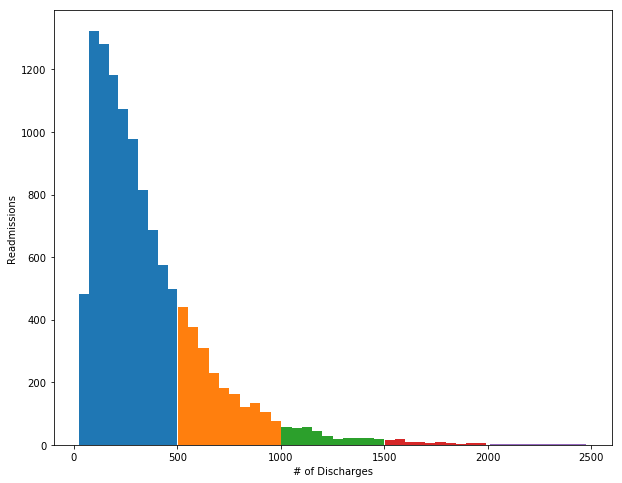

In [14]:
plt.figure(figsize=(10, 8))
x1 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 0 and a<= 500]
x2 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 501 and a <= 1000]
x3 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 1001 and a <= 1500]
x4 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 1501 and a <= 2000]
x5 = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3] if a > 2001 and a <= 2500]

plt.hist(x1)
plt.hist(x2)
plt.hist(x3)
plt.hist(x4)
plt.hist(x5)

plt.xlabel("# of Discharges")
plt.ylabel("Readmissions")
plt.show()

#### Observation 1. 
As you can tell from the above patched set of 5 histograms, with each bracket of 500 discharges, there is a decline
in the number of readmissions. This shows that the first claim from "Observations" is valid.

### Hypothesis Test

- Null Hypothesis $H_o$: There is no significant correlation between hospital capacity(number of discharges) and readmission rates. In other words, There is no difference between data point probability of excess readmissions rate $>$ 1 for discharges greater than 1000 and data point probability of excess readmissions rate $<$ 1 for discharges $<$ 1000.


- Alternative Hypothesis, $H_a$: There is significant correlation between hospital capacity(number of discharges) and readmission rates. In other words, there is a difference between data point probability of excess readmissions $>$ 1 for discharges greater than 1000 and probability of excess readmissions greater than 1 for discharges $<$ 1000.

In [17]:
# Split the data at 1000 discharges.
less_than_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']<1000]
above_1000 = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges']>=1000]


In [20]:
#Getting respective proportion values relative to 1000 discharges.
p_gte1000 = len(above_1000[above_1000['Excess Readmission Ratio']>1])/len(above_1000)
p_le1000 = len(less_than_1000[less_than_1000['Excess Readmission Ratio']>1])/len(less_than_1000)
print('Proportion of data greater than 1000 readmission', p_gte1000)
print('Proportion of data for less than 1000 readmission', p_le1000)


Proportion of data greater than 1000 readmission 0.44396551724137934
Proportion of data for less than 1000 readmission 0.5158358826705056


In [21]:
from statsmodels.stats.proportion import proportions_ztest

above = len(above_1000[above_1000['Excess Readmission Ratio']>1])
below = len(less_than_1000[less_than_1000['Excess Readmission Ratio']>1])

print('p-value: ', proportions_ztest(np.array([above,below]),np.array([len(above_1000),len(less_than_1000)]),value=0)[1])

p-value:  0.002408456942872711


Since the p-value is smaller than the significance level of $\alpha=$ 0.01,  Null Hypothesis is rejected. There is a difference between data point probability of excess readmissions greater than 1 for discharges greater than 1000 and probability of excess readmissions greater than 1 for discharges less than 1000.

### Statistical and practical significance of the analysis

From the calculations above, with less than 1000 discharges, there is a higher excessive rate of readmission. 

Given, hospitals should improve their quality of care so that the number of discharges can rise with no readmissions. At the same time, decrease in excess readmission ratio would be ideal as well by having patients possibly comply with their prescription.

***
The histogram below shows the count for each ratio result (hospital’s number of “predicted” 30-day 
readmissions for heart attack, heart failure, and pneumonia divided by the number that would be 
“expected,” based on an average hospital with similar patients)

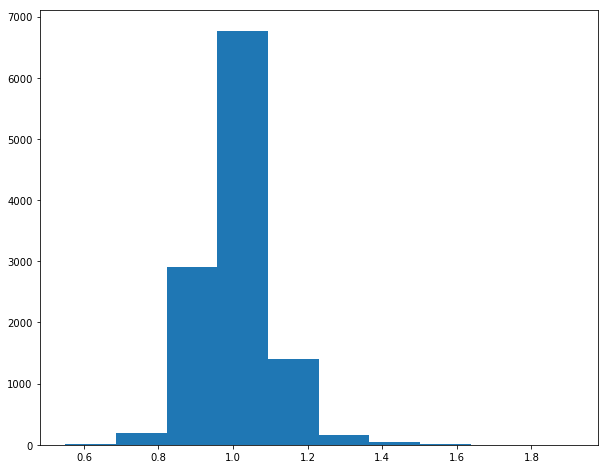

In [23]:

plt.figure(figsize=(10, 8))
plt.hist(y)
plt.show()

The advantage of using the scatterplot above is to see where the data points are 
concentrated. At the same time, scatterplots are best to see correlation between the x and y-axes.
Thus, the disadvantage here is that given the large amount of data points focused in one area, this makes 
it hard to tell the relationship between many points since there is a lot of overlap between points.

In order to show a more direct relationship between the x- and y- axis, a histogram would be a
good visualization to convey the data's information in a more direct manner. Separating out the frequency of 
x-axis data and the y-axis data would help give a direct conclusion on where points are concentrated. 
The following plots allow us to see the frequency within each discharge group and the frequency within each 
excess readmission ratio.

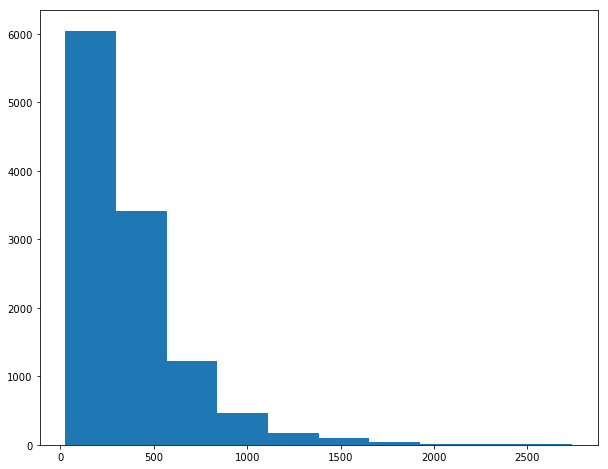

In [24]:
plt.figure(figsize=(10, 8))
plt.hist(x)
plt.show()

Based on these two different histograms, we can see more clearly the frequency of discharges decrease significantly
after 1000. Also, we can see that there is a high concentration of excessive admission rates concentrated at 1.0,
but there are significant numbers at 0.8 abd 1.2.

In [25]:
new=new[new['Number of Readmissions'].notnull()]
new['Number of Discharges']=pd.to_numeric(new['Number of Discharges'])

In [27]:
#Large hospitals with Number of Discharges>1000 are obly 463
bigcap=new[new['Number of Discharges']>1000]
B1=bigcap[bigcap['Excess Readmission Ratio']>1]
B2=bigcap[bigcap['Excess Readmission Ratio']<=1]

In [28]:
hosp1=new[new['Excess Readmission Ratio']<=1]
hosp2=new[new['Excess Readmission Ratio']>1]

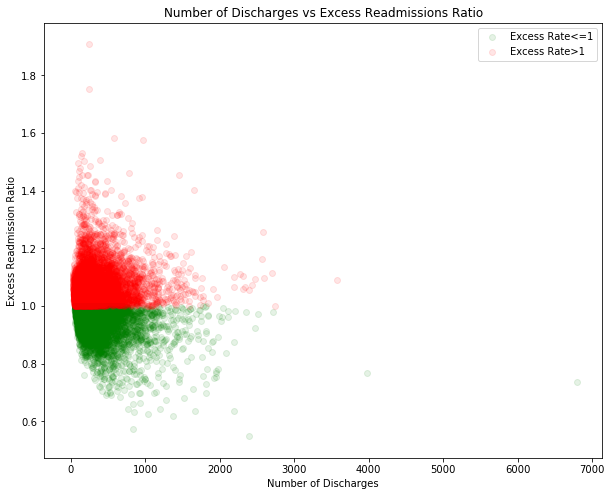

In [30]:
plt.figure(figsize=(10, 8))
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="Excess Rate<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='Excess Rate>1', alpha=0.1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()
plt.show()


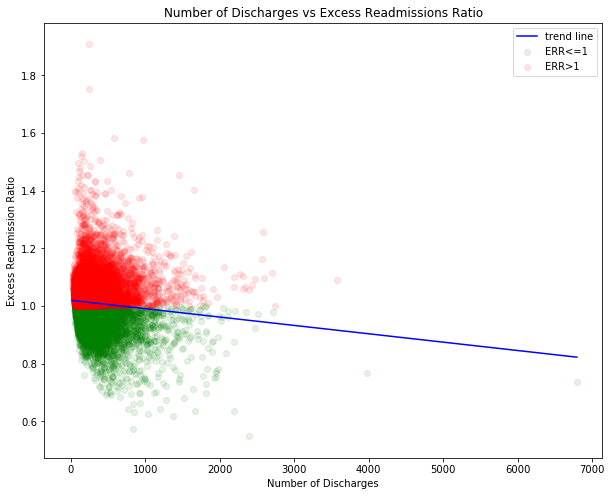

In [34]:
X=new['Number of Discharges'].sort_values()
y_trend=(-2.901e-05)*X + 1.02

plt.figure(figsize=(10, 8))
plt.scatter(hosp1['Number of Discharges'], hosp1['Excess Readmission Ratio'], c='g', label="ERR<=1", alpha=0.10)
plt.scatter(hosp2['Number of Discharges'], hosp2['Excess Readmission Ratio'], c='r', label='ERR>1', alpha=0.1)
plt.plot(X, y_trend, c='b', label='trend line')

plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')
plt.title('Number of Discharges vs Excess Readmissions Ratio')
plt.legend()
plt.show()